## Evaluating a classification model

### Review of model evaluation
- Need a way to choose between models: different model types, tuning parameters, and features
- Use a model evaluation procedure to estimate how well a model will generalize to out-of-sample data
- Requires a model evaluation metric to quantify the model performance


### Model evaluation procedures
1. Training and testing on the same data
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize

2. Train/test split
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility

3. K-fold cross-validation
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split

### Model evaluation metrics
    - Regression problems: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
    - Classification problems: Classification accuracy

### Classification accuracy
Pima Indians Diabetes dataset originally from the UCI Machine Learning Repository

In [41]:
import pandas as pd

pima= pd.read_csv("Data/diabetes.csv")
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [43]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

* **Classification accuracy:** percentage of correct predictions

In [46]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334


* **Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [47]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [48]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [49]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [50]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [51]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

In [52]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


* Note that it generally made errors when the value is 1.

#### Conclusion:

- Classification accuracy is the easiest classification metric to understand
- But, it does not tell you the underlying distribution of response values
- And, it does not tell you what "types" of errors your classifier is making

### Confusion matrix
Table that describes the performance of a classification model

In [53]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[114  16]
 [ 46  16]]


![Matrix](Data/confusion_matrix_1.png)

- Every observation in the testing set is represented in exactly one box
- It's a 2x2 matrix because there are 2 response classes
- The format shown here is not universal


#### Basic terminology

- True Positives (TP): we correctly predicted that they do have diabetes
- True Negatives (TN): we correctly predicted that they don't have diabetes
- False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
- False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

In [54]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
confusion

array([[114,  16],
       [ 46,  16]], dtype=int64)

In [55]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       130
           1       0.50      0.26      0.34        62

    accuracy                           0.68       192
   macro avg       0.61      0.57      0.56       192
weighted avg       0.64      0.68      0.64       192



### Metrics computed from a confusion matrix
**Classification Accuracy:** Overall, how often is the classifier correct?

In [56]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334
0.6770833333333334


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [57]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3229166666666667
0.32291666666666663


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [58]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.25806451612903225
0.25806451612903225


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [59]:
print(TN / float(TN + FP))

0.8769230769230769


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [60]:
print(FP / float(TN + FP))

0.12307692307692308


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [61]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5
0.5


Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

#### Conclusion:

- Confusion matrix gives you a more complete picture of how your classifier is performing
- Also allows you to compute various classification metrics, and these metrics can guide your model selection

#### Which metrics should you focus on?

- Choice of metric depends on your business objective
- Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

### Adjusting the classification threshold

In [62]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [63]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [64]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [65]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

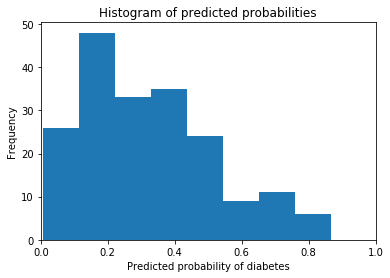

In [66]:
import matplotlib.pyplot as plt
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

#### Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [67]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [68]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [69]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [70]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[114  16]
 [ 46  16]]


In [71]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[82 48]
 [17 45]]


In [72]:
# sensitivity has increased (used to be 0.258)
print(45 / float(45 + 17))

0.7258064516129032


In [73]:
# specificity has decreased (used to be 0.877)
print(82 / float(82 + 48))

0.6307692307692307


#### Conclusion:

- Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be adjusted to increase sensitivity or specificity
- Sensitivity and specificity have an inverse relationship

### ROC Curves and Area Under the Curve (AUC)

**Question:** Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve!

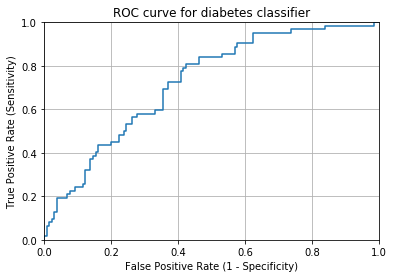

In [74]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [75]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [76]:
evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [77]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


* AUC is the percentage of the ROC plot that is underneath the curve:

In [78]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
- AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [79]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225

#### Confusion matrix advantages:

- Allows you to calculate a variety of metrics
- Useful for multi-class problems (more than two response classes)

#### ROC/AUC advantages:

- Does not require you to set a classification threshold
- Still useful when there is high class imbalance

Source: Data School - Machine learning in Python with scikit-learn